In [75]:
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils
import os
from PIL import Image

In [78]:
class DroopyDataset():
    def __init__(self, img_dir, transform1=None, transform2=None):
    
        self.img_dir = img_dir
        
        
        self.img_names = os.listdir(img_dir)
        
        
        self.transform1 = transform1
        self.transform2 = transform2
        
        self.imgs = []
        for img_name in self.img_names:
            img = Image.open(os.path.join(img_dir, img_name))
            
            if self.transform1 is not None:
                img = self.transform1(img)
                
            self.imgs.append(img)

    def __getitem__(self, index):
        img = self.imgs[index]
        
        if self.transform2 is not None:
            img = self.transform2(img)
        
        return img

    def __len__(self):
        return len(self.imgs)

In [84]:



batch_size = 64
imageSize = 64

# 64x64 images!
transform = transforms.Compose([
                                transforms.Grayscale(1),
                                transforms.Resize(64),
                                transforms.CenterCrop(64)])


# Data augmentation and converting to tensors
random_transforms = [transforms.RandomRotation(degrees=5)]
transform2 = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),
                                 transforms.RandomApply(random_transforms, p=0.3), 
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = DroopyDataset('Strokefaces/droopy', transform1=transform, transform2=transform2)
dataloader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)


# imgs = imgs.numpy().transpose(0, 2, 3, 1)

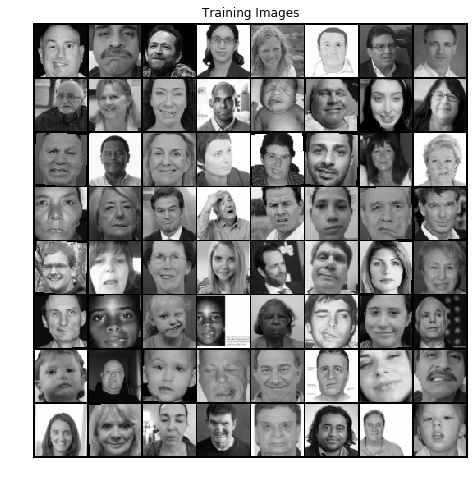

In [99]:
imgs = next(iter(dataloader))
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(
        np.transpose(vutils.make_grid(imgs[:64], padding=2, normalize=True).cpu(), (1, 2, 0)))
plt.show()